gen_train [0 1 1 1 0]
[0 1 1 1 0]
total live:  342
total dead:  549
0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64
80
97
372
['S', 'C', 'Q']
[1, 0, 3, 4, 2, 5, 8]
398
97
15
12
15
5
7
0

210
112
13
4
3
0
0
0
age len 891
age_float len 891
0    0.0
1    0.5
2    0.0
3    0.0
4    0.0
5    1.0
Name: Embarked_num, dtype: float64
Train set describe:             Pclass  Sex_and_Name   Age_Float   Cabin_num  Embarked_num
count  891.000000    891.000000  891.000000  891.000000    891.000000
mean     0.345679      0.647587    0.300933    0.228956      0.180696
std      0.418036      0.477990    0.134213    0.420397      0.317837
min      0.000000      0.000000    0.004200    0.000000      0.000000
25%      0.000000      0.000000    0.210000    0.000000      0.000000
50%      0.000000      1.000000    0.285000    0.000000      0.000000
75%      0.500000      1.000000    0.380000    0.000000      0.500000
max      1.000000      1.000000    0.800000    1.000000      1.000000
Stochast

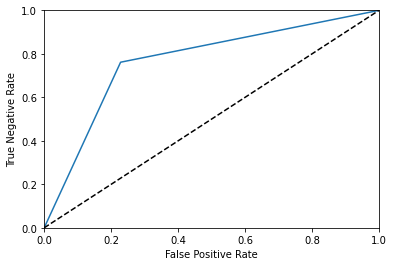

In [11]:
%matplotlib inline
import math
import random
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

def CabinNotRecorded(cabin, y_train):
    not_record_dead = 0;
    not_record_live = 0;
    total_dead = 0
    total_live = 0
    total_not_record = 0
    total_recorded = 0
    for i in range(cabin.size):
        if not (isinstance(cabin[i], str)):
            total_not_record +=1
            if y_train[i] == 0:
                not_record_dead +=1
                total_dead +=1
            else:
                not_record_live +=1
                total_live +=1
        else:
            total_recorded += 1
            if y_train[i] == 0:
                total_dead += 1
            else:
                total_live += 1
    print("total live: ", total_live)
    print("total dead: ", total_dead)
    
def PclassDead(pclass, y_train):
    pcl = pclass
    class_1 = 0
    class_2 = 0
    class_3 = 0
    for i in range(y_train.size):
        if (pcl[i] == 1 and y_train[i] == 0):
            class_1 +=1
        elif (pcl[i] == 2 and y_train[i] == 0):
            class_2 +=1
        elif (pcl[i] == 3 and y_train[i] == 0):
            class_3 +=1
    print(class_1)
    print(class_2)
    print(class_3)
    
def EmbarkedUnique(embarked):
    unique_ele = []
    ele_point = 0
    for i in range(embarked.size):
        if isinstance(embarked[i], str):
            ele = embarked[i]
            if ele not in unique_ele:
                unique_ele += ele
                ele_point += 1
                
    print(unique_ele)
    
def sibsp_values(sibsp):
    unique_ele = []
    ele_point = 0
    for i in range(sibsp.size):
        ele = sibsp[i]
        if ele not in unique_ele:
            unique_ele.append(int(ele))
            ele_point += 1
                
    print(unique_ele)
    
def sibsp_relation(sibsp, y_train, x):
    live_0 = 0
    live_1 = 0
    live_2 = 0
    live_3 = 0
    live_4 = 0
    live_5 = 0
    live_8 = 0
    live_other = 0
    for i in range(sibsp.size):
        if y_train[i] == x:
            if sibsp[i] == 0:
                live_0 += 1
            elif sibsp[i] == 1:
                live_1 += 1
            elif sibsp[i] == 2:
                live_2 += 1
            elif sibsp[i] == 3:
                live_3 += 1
            elif sibsp[i] == 4:
                live_4 += 1
            elif sibsp[i] == 5:
                live_5 += 1
            elif sibsp[i] == 8:
                live_8 += 1
            else:
                live_other += 1
    print(live_0)
    print(live_1)
    print(live_2)
    print(live_3)
    print(live_4)
    print(live_5)
    print(live_8)
    print(live_other)
    
def name_lengths(names, gender, y_train):
    total_live_men = 0
    total_dead_men = 0
    total_live_women = 0
    total_dead_women = 0
    men_live_total = 0
    men_dead_total = 0
    women_live_total = 0
    women_dead_total = 0
    avg_men_live_len = 0
    avg_men_dead_len = 0
    avg_women_live_len = 0
    avg_women_dead_len = 0
    for i in range(y_train.size):
        if gender[i] == 0:
            if y_train[i] == 1:
                women_live_total += len(names[i])
                total_live_women += 1
            else:
                women_dead_total += len(names[i])
                total_dead_women += 1
        else:
            if y_train[i] == 1:
                men_live_total += len(names[i])
                total_live_men += 1
            else:
                men_dead_total += len(names[i])
                total_dead_men += 1
    
    avg_men_live_len = men_live_total/ total_live_men
    avg_men_dead_len = men_dead_total/ total_dead_men
    avg_women_live_len = women_live_total/ total_live_women
    avg_women_dead_len = women_dead_total / total_dead_women
    
    print(avg_men_live_len)
    print(avg_men_dead_len)
    print()
    print(avg_women_live_len)
    print(avg_women_dead_len)
            
def miss_vs_mrs(name, gender, y_train):
    total_miss_live = 0
    total_miss_dead = 0
    total_mrs_live = 0
    total_mrs_dead = 0
    total_women = 0
    total_miss = 0
    total_mrs = 0
    for i in range(y_train.size):
        if gender[i] == 0:
            total_women += 1
            if name[i].find('Miss') != -1:
                total_miss +=1
                if y_train[i] == 1:
                    total_miss_live += 1
                else:
                    total_miss_dead += 1
            else:
                total_mrs += 1
                if y_train[i] == 1:
                    total_mrs_live += 1
                else:
                    total_mrs_dead += 1
    print(total_women, total_miss, total_mrs)
    print(total_miss_live, total_miss_dead)
    print(total_mrs_live, total_mrs_dead)
    
    
    
            
                
            
data = pd.read_csv(r'E:\Machine Learning & A.I\Titanic dataset\titanic_train.csv')
#print(data.columns)

X_all = data.copy()
X_train = X_all.drop(labels='Survived', axis=1)

gender_dict = {'female' : 1,
               'male' : 0}

embarked_dict = {'S' : 0,
                 'C' : 0.5,
                 'Q' : 1}

pclass_dict = {3 : 0,
               2 : 0.5,
               1 : 1}

gender_only = data[['Sex', 'Survived']].copy()
gender_only['Sex_bool'] = gender_only['Sex'].map(gender_dict)
gender = gender_only.values
gen_train = gender[:, 2]
y_train = gender[:, 1] #target values
y_train = y_train.astype('int')
print("gen_train", gen_train[:5])
print(y_train[:5])
#print("Percentage of females who survived:", female_survive_ratio) # 90.91%
#print("Percentage of males who survived:", male_survive_ratio) # 47.47%
#Gender played a huge role in survival

age_only = data['Age'].copy()
age = age_only.values
#AverageAge(age, y_train)
#age seems to be an irrelevant value on it's own

cabin_only = data['Cabin'].copy()
cabin = cabin_only.values
CabinNotRecorded(cabin, y_train)
#87% of people who died did not have their cabin reported whereas 60% of people who lived didn't.
#Good delta between the two.Those who had their cabins recorded survived 2/3'rds of the time
#Replace cabin with binary cabin_recorded field

pclass_only = data['Pclass'].copy()
pclass = pclass_only.values
print(pclass_only.head())
PclassDead(pclass, y_train)
#majority of deaths were 3rd class, 372, 2nd class: 97: 1st class: 80

embarked_only = data['Embarked'].copy()
embarked = embarked_only.values
EmbarkedUnique(embarked)

sibsp_only = data['SibSp'].copy()
sibsp = sibsp_only.values
sibsp_values(sibsp)
sibsp_relation(sibsp, y_train, 0) #dead
print()
sibsp_relation(sibsp, y_train, 1)
#not really useful, should drop.

name_only = data['Name'].copy()
name = name_only.values

#name_lengths(name, gen_train, y_train)
#name length has little bearing on survival, need to see if Miss vs. Mrs. makes a difference
#miss_vs_mrs(name, gen_train, y_train)
#married women actually had better survival rates, 80% of all married women survived vs 70% for miss.
#Remove name and replace with women_married
#turn sex into male, mrs. and miss for better segreagation.



def Pipeline(X_train, name, gen_train, pclass_dict, cabin, embarked_dict, age):
    #drop the useless values first.
    drop_these = ['SibSp', 'Parch', 'Ticket', 'Name', 'Sex', 'Fare', 'PassengerId']
    X_train.drop(labels=drop_these, axis=1, inplace=True)
    #Name and Sex are passed into the function anyway using the arrayscreated above
    
    #Map name and sex to one category,
    gen_and_name = [] #array to hold the values
    for i in range(name.size):
        if gen_train[i] == 1: #if a male then set to 0
            gen_and_name.append(0.0)
        else:
            if name[i].find('Miss') != -1: #if not married then set to .5
                gen_and_name.append(0.5)
            else: #if married set to 1
                gen_and_name.append(1.0) 
    X_train['Sex_and_Name'] = gen_and_name #assigns this array to a new column
    #Name and sex done
    
    #Map age to between zero and one
    #If age is missing randomly assign it either 25, 50, or 75% of the average(?)
    print("age len", age.size)
    age_float =[] #age between 0 and 1, ages over 100 will be seen as 1
    for i in range(age.size):
        if age[i] >= 100:
            age_float.append(1)
        elif math.isnan(age[i]): 
            age_sel = random.randint(0,3)
            if age_sel == 1:
                age[i] = 0.20
            elif age_sel == 2:
                age[i] = 0.28
            else:
                age[i] = 0.38
            age_float.append(age[i])
        else:
            age_float.append(age[i]/100)
    X_train.drop(['Age'], axis=1, inplace=True) #discards standrad age column
    print("age_float len", len(age_float))
    X_train['Age_Float'] = age_float #replaced with the floating point ages.
    #Age is done
    
    #Pclass is next
    X_train['Pclass'] = X_train['Pclass'].map(pclass_dict)
    #X_train.drop(['Pclass'], axis=1)
    #Pclass is done
    
    #Cabin is next
    cabin_bool = []
    for i in range(cabin.size):
        if isinstance(cabin[i], str):
            cabin_bool.append(1)
        else:
            cabin_bool.append(0)
    X_train['Cabin_num'] = cabin_bool
    X_train.drop(labels='Cabin', axis=1, inplace=True)
    #Cabin is done
    
    #Embarked is next
    X_train['Embarked'].fillna('S', inplace=True)
    X_train['Embarked_num'] = X_train['Embarked'].map(embarked_dict)
    X_train.drop(['Embarked'], axis=1, inplace=True)
    print(X_train['Embarked_num'].head(6))
    print("Train set describe: ", X_train.describe())
    #embarked is done and that is it
    
    return X_train

def accuracy(X, y):
    wrong = 0
    for i in range(X.size):
        if X[i] != y[i]:
            wrong += 1
    not_wrong = X.size - wrong
    print("Correct: ", not_wrong)
    print("Wrong: ", wrong)
    print("total: ", X.size)
    print("Accuracy: ", not_wrong/X.size) 
    
def plot_precision_vs_recall(recalls, precisions):
    plt.plot(recalls[:-1], precisions[:-1], "b-", Label="Precision vs Recall")
    plt.xlabel("Recall")
    plt.legend(loc="center left")
    plt.ylim([0,1])
    plt.xlim([0,1])
    
def plot_roc_curve(fpr, tnr, label=None):
    plt.plot(fpr, tnr, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Negative Rate")
    
#---SETTING UP THE TEST CSV---#
def clean_test_csv():
    test_data = pd.read_csv(r'E:\Machine Learning & A.I\Titanic dataset\titanic_test.csv')
    
    gender_dict = {'female' : 1,
                   'male' : 0}
    embarked_dict = {'S' : 0,
                     'C' : 0.5,
                     'Q' : 1}
    pclass_dict = {3 : 0,
                   2 : 0.5,
                   1 : 1}
    
    #gets all the required arguments for the pipeline function
    #sets up gender and gets the passenger id's
    test_gend_only = test_data[['PassengerId','Sex']].copy()
    test_gend_only['Sex_bool'] = test_gend_only['Sex'].map(gender_dict)
    test_gend = test_gend_only.values
    test_gender = test_gend[:, 2]
    test_id_vals = test_gend[:, 0]

    test_age_only = test_data['Age'].copy() #sets up age
    test_age = test_age_only.values

    test_cabin_only = test_data['Cabin'].copy() #sets up cabin
    test_cabin = test_cabin_only.values

    test_pclass_only = test_data['Pclass'].copy() #sets up class 
    test_pclass = test_pclass_only.values

    test_embarked_only = test_data['Embarked'].copy() #sets up embarked
    test_embarked = test_embarked_only.values
    
    test_name_only = test_data['Name'].copy() #sets up name
    test_name = test_name_only.values
    
    X_test_clean_dataframe = Pipeline(test_data, test_name, test_gender, pclass_dict, 
                                      test_cabin, embarked_dict, test_age)
    return X_test_clean_dataframe.values, test_id_vals
    

X_train_clean_dataframe = Pipeline(X_train, name, gen_train, pclass_dict, cabin, embarked_dict, age)
X_train_clean = X_train_clean_dataframe.values 
#Turns the pandas frame into a numpy array for processing

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train_clean, y_train)
sgd_pred = sgd_clf.predict(X_train_clean)
print("Stochastic Gradient Descent:")
accuracy(sgd_pred, y_train)

#y_scores_sgd = cross_val_predict(sgd_clf, X_train_clean, y_train, cv=3)
#precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_sgd)
#plot_precision_vs_recall(recalls, precisions)
#SGD is a poor choice for this problem, ~80% precision at only ~50% recall

rfor_clf = RandomForestClassifier(max_depth = 20, n_estimators = 100)
rfor_clf.fit(X_train_clean, y_train)
rfor_pred = rfor_clf.predict(X_train_clean)
print("Random Forest:")
accuracy(rfor_pred, y_train)
y_scores_rfor = cross_val_predict(sgd_clf, X_train_clean, y_train, cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores_rfor)
#plot_precision_vs_recall(recalls, precisions)
fpr, tnr, thresholds = roc_curve(y_scores_rfor, y_train)
plot_roc_curve(fpr, tnr)
#Not that much better either
#this data may have higher dimensionality so simplier linear classifiers may work better
#try linear SVM and naive bayes

X_test_clean, test_id_vals = clean_test_csv()
test_pred = rfor_clf.predict(X_test_clean)
assert len(test_pred) == len(test_id_vals), "Mismatched length"
print("Test pred length: ", len(test_pred))
#file_path = r'E:/Machine Learning & A.I/Titanic dataset/Titanic answers.txt'
#f = open(file_path, "a")
#for index, pred in enumerate(test_pred):
#    result = str(test_id_vals[index]) + ", " + str(pred) + "\n"
#    f.write(result)
#f.close()

results_df = pd.DataFrame(data={'PassengerId':test_id_vals, 'Survived':test_pred})
results_df.to_csv(r'E:/Machine Learning & A.I/Titanic dataset/Titanic final.csv', index=False)




